In [2]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from os.path import join, isfile
from os import listdir, mkdir
from glob import glob

In [77]:
def clip(data, rate):
    borders = np.empty(2)
    np.quantile(data, [1 - rate, rate], out=borders)
    np.clip(data, borders[0], borders[1], data)
    return data

def normalize(data):
    data = (data - data.min())/(data.max()-data.min())
    return 1 - data

In [78]:
fits_dir = 'data/spectra/'
images_dir = 'data/spectra/images'
files = listdir(fits_dir)
mkdir(images_path)

In [79]:
data = {}
bad_files = ['s18251605.fits', 
             'flat605.fits', 
             'srgk0087.fits',
             '.DS_Store']
bad_objects = ['test', 'Neon']

for file in files:
    if file in bad_files:
        continue
        
    if isfile(join(fits_dir, file)):
        hdus = fits.open(join(fits_dir, file))
        obj = hdus[0].header['OBJECT']
        
        if obj in bad_objects:
            continue
            
        if data.get(obj) == None:
            data[obj] = [file]
        else:
            data[obj].append(file)

In [80]:
for obj in data.keys():
    cur_dir = join(images_dir, obj)
    mkdir(cur_dir)
    
    if len(data[obj]) == 1:
        continue
    
    for file in data[obj]:
        img = fits.getdata(join(fits_dir, file))
        img = normalize(clip(img, 0.95))
        
        file_path = join(cur_dir, '{}.png'.format(file.split('.')[0]))

        plt.imsave(file_path, img, cmap='gray')

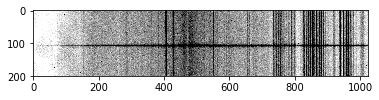

In [3]:
from skimage.io import imread

dir_path = 'data/spectra/images/165602.3+211247r/'
img_path = glob(join(dir_path, '*png'))[0]
img = imread(img_path, as_gray=True)
plt.imshow(img, cmap='gray')

INFO: Iteration 1: Found 379 cosmic-ray pixels, Total: 379 [lacosmic.lacosmic]
INFO: Iteration 2: Found 192 cosmic-ray pixels, Total: 571 [lacosmic.lacosmic]
INFO: Iteration 3: Found 115 cosmic-ray pixels, Total: 686 [lacosmic.lacosmic]
INFO: Iteration 4: Found 57 cosmic-ray pixels, Total: 743 [lacosmic.lacosmic]


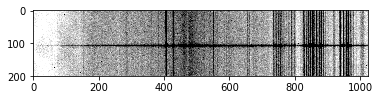

In [9]:
from lacosmic import lacosmic
plt.imshow(lacosmic(img, contrast=0.5, cr_threshold=3, neighbor_threshold=3, effective_gain=10, readnoise=0.1)[0], cmap='gray')